In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
# Import insurance dataset
ins_df = pd.read_csv('insurance.csv')
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
# Checking for any missing values 
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# categorical_values = ['sex','smoker','region']
# x_features = ['age','bmi','children','charges']
# ins_df = pd.get_dummies(ins_df)

In [11]:
# Converting categorical values to numerical
categorical_values = ['sex','smoker','region']
def cat_to_num(df,values):
    for i in values:
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes
cat_to_num(ins_df,categorical_values)


In [31]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
ins_df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [32]:
x = ins_df.drop(columns='charges')
y = ins_df['charges']
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [50]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.7,random_state=42)

In [51]:
lm = LinearRegression()
lm

LinearRegression()

In [53]:
lm.fit(train_x,train_y)

LinearRegression()

In [54]:
lm.coef_

array([  261.62568984,   109.64719595,   344.54483066,   424.37016596,
       23620.80252148,  -326.46262527])

In [55]:
lm.intercept_

-12364.391322279258

In [64]:
pred_y = lm.predict(test_x)

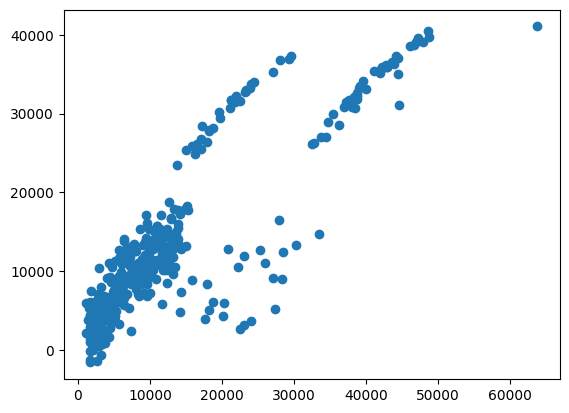

In [66]:
plt.scatter(test_y,pred_y)

In [71]:
print("R2 Score : {}".format(np.abs(r2_score(test_y,pred_y))))

R2 Score : 0.7694415927057693
